In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

COMPAS Data

In [187]:
compas_data = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Compas\compas-scores-two-years.csv")

In [188]:
print(compas_data.shape)

(7214, 53)


In [189]:
print(compas_data.head(2))

   id              name   first       last compas_screening_date   sex  \
0   1  miguel hernandez  miguel  hernandez            2013-08-14  Male   
1   3       kevon dixon   kevon      dixon            2013-01-27  Male   

          dob  age          age_cat              race  ...  v_decile_score  \
0  1947-04-18   69  Greater than 45             Other  ...               1   
1  1982-01-22   34          25 - 45  African-American  ...               1   

   v_score_text  v_screening_date  in_custody  out_custody  priors_count.1  \
0           Low        2013-08-14  2014-07-07   2014-07-14               0   
1           Low        2013-01-27  2013-01-26   2013-02-05               0   

  start  end event two_year_recid  
0     0  327     0              0  
1     9  159     1              1  

[2 rows x 53 columns]


In [190]:
print(compas_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [191]:
print(compas_data.describe())

                 id          age  juv_fel_count  decile_score  juv_misd_count  \
count   7214.000000  7214.000000    7214.000000   7214.000000     7214.000000   
mean    5501.255753    34.817993       0.067230      4.509565        0.090934   
std     3175.706870    11.888922       0.473972      2.856396        0.485239   
min        1.000000    18.000000       0.000000      1.000000        0.000000   
25%     2735.250000    25.000000       0.000000      2.000000        0.000000   
50%     5509.500000    31.000000       0.000000      4.000000        0.000000   
75%     8246.500000    42.000000       0.000000      7.000000        0.000000   
max    11001.000000    96.000000      20.000000     10.000000       13.000000   

       juv_other_count  priors_count  days_b_screening_arrest  \
count      7214.000000   7214.000000              6907.000000   
mean          0.109371      3.472415                 3.304763   
std           0.501586      4.882538                75.809505   
min       

In [195]:
compas_data.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [196]:
missing_values = compas_data.isnull().sum()
print(missing_values[missing_values > 0])


days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_desc                29
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_out                 4898
violent_recid              7214
vr_case_number             6395
vr_charge_degree           6395
vr_offense_date            6395
vr_charge_desc             6395
in_custody                  236
out_custody                 236
dtype: int64


In [197]:
compas_data.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [199]:
# Calculate the percentage of missing values for each column
missing_percentage = compas_data.isnull().mean() * 100
print(missing_percentage)


id                           0.000000
name                         0.000000
first                        0.000000
last                         0.000000
compas_screening_date        0.000000
sex                          0.000000
dob                          0.000000
age                          0.000000
age_cat                      0.000000
race                         0.000000
juv_fel_count                0.000000
decile_score                 0.000000
juv_misd_count               0.000000
juv_other_count              0.000000
priors_count                 0.000000
days_b_screening_arrest      4.255614
c_jail_in                    4.255614
c_jail_out                   4.255614
c_case_number                0.304963
c_offense_date              16.065983
c_arrest_date               84.238980
c_days_from_compas           0.304963
c_charge_degree              0.000000
c_charge_desc                0.401996
is_recid                     0.000000
r_case_number               51.885223
r_charge_deg

**### COMPAS Data Modification**

Compas_data is the original data and Compas_data_modify is the modified data

In [200]:
# Remove columns with more than 80% missing values
# Define threshold for column removal based on missing values
threshold = 0.85

# Identify columns with a higher proportion of missing values than the threshold
removed_columns = compas_data.columns[compas_data.isnull().mean() >= threshold]
print("Columns removed due to high missing rate:")
print(removed_columns)

# Filter the dataset to keep columns with missing values below the threshold
compas_data_modify = compas_data.loc[:, compas_data.isnull().mean() < threshold]


Columns removed due to high missing rate:
Index(['violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc'],
      dtype='object')


In [201]:
print(compas_data_modify.shape)

(7214, 48)


In [202]:
compas_data_modify = compas_data_modify.drop(columns=['id']) #id coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['name']) #name coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['first']) #first coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['last']) #last coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['dob']) #dob coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['compas_screening_date']) #compas_screening_date coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['c_case_number']) #c_case_number coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['r_case_number']) #r_case_number coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['screening_date']) #screening_date coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['c_charge_desc']) #c_charge_desc coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['r_charge_desc']) #r_charge_desc coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['v_screening_date']) #v_screening_date coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['v_type_of_assessment']) #v_type_of_assessment coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['type_of_assessment']) #type_of_assessment coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['event']) #event coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['r_offense_date']) #r_offense_date coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['c_offense_date']) #c_offense_date coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['c_arrest_date']) #c_arrest_date coloumn droped

print(compas_data_modify.shape)

(7214, 30)


In [203]:
compas_data_modify.columns

Index(['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'is_recid', 'r_charge_degree',
       'r_days_from_arrest', 'r_jail_in', 'r_jail_out', 'is_violent_recid',
       'decile_score.1', 'score_text', 'v_decile_score', 'v_score_text',
       'in_custody', 'out_custody', 'priors_count.1', 'start', 'end',
       'two_year_recid'],
      dtype='object')

In [204]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

compas_data_modify["sex"] = label_encoder.fit_transform(compas_data_modify["sex"])
compas_data_modify["age_cat"] = label_encoder.fit_transform(compas_data_modify["age_cat"])
compas_data_modify["race"] = label_encoder.fit_transform(compas_data_modify["race"])
compas_data_modify["c_charge_degree"] = label_encoder.fit_transform(compas_data_modify["c_charge_degree"])
compas_data_modify["r_charge_degree"] = label_encoder.fit_transform(compas_data_modify["r_charge_degree"])
compas_data_modify["score_text"] = label_encoder.fit_transform(compas_data_modify["score_text"])
compas_data_modify["v_score_text"] = label_encoder.fit_transform(compas_data_modify["v_score_text"])


In [205]:
compas_data_modify.columns

Index(['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'is_recid', 'r_charge_degree',
       'r_days_from_arrest', 'r_jail_in', 'r_jail_out', 'is_violent_recid',
       'decile_score.1', 'score_text', 'v_decile_score', 'v_score_text',
       'in_custody', 'out_custody', 'priors_count.1', 'start', 'end',
       'two_year_recid'],
      dtype='object')

In [206]:
compas_data_modify['c_jail_in'] = pd.to_datetime(compas_data_modify['c_jail_in'])
compas_data_modify['c_jail_out'] = pd.to_datetime(compas_data_modify['c_jail_out'])

# Calculate the duration in c_jail in days
compas_data_modify['c_days_in_jail'] = (compas_data_modify['c_jail_out'] - compas_data_modify['c_jail_in']).dt.days

compas_data_modify['r_jail_in'] = pd.to_datetime(compas_data_modify['r_jail_in'])
compas_data_modify['r_jail_out'] = pd.to_datetime(compas_data_modify['r_jail_out'])

# Calculate the duration in r_jail in days
compas_data_modify['r_days_in_jail'] = (compas_data_modify['r_jail_out'] - compas_data_modify['r_jail_in']).dt.days

compas_data_modify['in_custody'] = pd.to_datetime(compas_data_modify['in_custody'])
compas_data_modify['out_custody'] = pd.to_datetime(compas_data_modify['out_custody'])

# Calculate of duration in custody
compas_data_modify['duration_custody'] = (compas_data_modify['out_custody'] - compas_data_modify['in_custody']).dt.days


In [207]:
compas_data_modify = compas_data_modify.drop(columns=['c_jail_in']) #c_jail_in coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['c_jail_out']) #c_jail_out coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['r_jail_in']) #r_jail_in coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['r_jail_out']) #r_jail_out coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['in_custody']) #in_custody coloumn droped
compas_data_modify = compas_data_modify.drop(columns=['out_custody']) #out_custody coloumn droped

In [208]:
compas_data_modify.shape

(7214, 27)

In [209]:
compas_data_modify.info([5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      7214 non-null   int64  
 1   age                      7214 non-null   int64  
 2   age_cat                  7214 non-null   int64  
 3   race                     7214 non-null   int64  
 4   juv_fel_count            7214 non-null   int64  
 5   decile_score             7214 non-null   int64  
 6   juv_misd_count           7214 non-null   int64  
 7   juv_other_count          7214 non-null   int64  
 8   priors_count             7214 non-null   int64  
 9   days_b_screening_arrest  6907 non-null   float64
 10  c_days_from_compas       7192 non-null   float64
 11  c_charge_degree          7214 non-null   int64  
 12  is_recid                 7214 non-null   int64  
 13  r_charge_degree          7214 non-null   int64  
 14  r_days_from_arrest      

In [212]:
missing_percentage = compas_data_modify.isnull().mean() * 100
print(missing_percentage)

sex                         0.000000
age                         0.000000
age_cat                     0.000000
race                        0.000000
juv_fel_count               0.000000
decile_score                0.000000
juv_misd_count              0.000000
juv_other_count             0.000000
priors_count                0.000000
days_b_screening_arrest     4.255614
c_days_from_compas          0.304963
c_charge_degree             0.000000
is_recid                    0.000000
r_charge_degree             0.000000
r_days_from_arrest         67.895758
is_violent_recid            0.000000
decile_score.1              0.000000
score_text                  0.000000
v_decile_score              0.000000
v_score_text                0.000000
priors_count.1              0.000000
start                       0.000000
end                         0.000000
two_year_recid              0.000000
c_days_in_jail              4.255614
r_days_in_jail             67.895758
duration_custody            3.271417
d

Total Percentage of missing values in COMPAS DATA

In [213]:
# Calculate total percentage of missing values in the dataset
Compas_total_missing_percentage = compas_data_modify.isnull().sum().sum() / (compas_data_modify.shape[0] * compas_data_modify.shape[1]) * 100

print(f"Total percentage of missing values: {Compas_total_missing_percentage:.2f}%")


Total percentage of missing values: 5.48%


**Ground Truth COMPAS Data with 5.48% missing values.**

In [215]:
compas_data_modify.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Compas\compas_groundTruth.csv", index=False)

**COMPAS 10% MCAR**

In [218]:
compas_data_mcar10 = compas_data_modify.copy()
additional_missing_rate = 0.10
excluded_columns = ['two_year_recid']
data_for_missing = compas_data_mcar10.drop(columns=excluded_columns)

# the current number of missing entries
current_missing = data_for_missing.isna().sum().sum()

# the target total number of missing entries
total_entries = data_for_missing.size
target_missing = int(total_entries * (additional_missing_rate + current_missing / total_entries))

# the new number of missing values to add
num_new_missing = target_missing - current_missing

# Flatten the row and column indices and randomly choose num_new_missing indices
nan_row_indices = np.random.choice(data_for_missing.index, num_new_missing, replace=True)
nan_col_indices = np.random.choice(data_for_missing.columns, num_new_missing, replace=True)

# the selected indices to NaN in the main DataFrame
for row, col in zip(nan_row_indices, nan_col_indices):
    compas_data_mcar10.loc[row, col] = np.nan

# the updated DataFrame with additional missing values to a CSV file
compas_data_mcar10.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Compas\compas_data_mcar10.csv", index=False)

In [219]:
Compas_total_missing_percentage = compas_data_mcar10.isnull().sum().sum() / (compas_data_mcar10.shape[0] * compas_data_mcar10.shape[1]) * 100

print(f"Total percentage of missing values: {Compas_total_missing_percentage:.2f}%")

Total percentage of missing values: 14.11%


**COMPAS 20% MCAR**

In [224]:
compas_data_mcar20 = compas_data_modify.copy()
additional_missing_rate = 0.20
excluded_columns = ['two_year_recid']
data_for_missing = compas_data_mcar20.drop(columns=excluded_columns)

# the current number of missing entries
current_missing = data_for_missing.isna().sum().sum()

# the target total number of missing entries
total_entries = data_for_missing.size
target_missing = int(total_entries * (additional_missing_rate + current_missing / total_entries))

# the new number of missing values to add
num_new_missing = target_missing - current_missing

# Flatten the row and column indices and randomly choose num_new_missing indices
nan_row_indices = np.random.choice(data_for_missing.index, num_new_missing, replace=True)
nan_col_indices = np.random.choice(data_for_missing.columns, num_new_missing, replace=True)

# the selected indices to NaN in the main DataFrame
for row, col in zip(nan_row_indices, nan_col_indices):
    compas_data_mcar20.loc[row, col] = np.nan

# the updated DataFrame with additional missing values to a CSV file
compas_data_mcar20.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Compas\compas_data_mcar20.csv", index=False)

In [225]:
Compas_total_missing_percentage = compas_data_mcar20.isnull().sum().sum() / (compas_data_mcar20.shape[0] * compas_data_mcar20.shape[1]) * 100

print(f"Total percentage of missing values: {Compas_total_missing_percentage:.2f}%")

Total percentage of missing values: 21.96%


**COMPAS 25% MCAR**

In [238]:
compas_data_mcar25 = compas_data_modify.copy()
additional_missing_rate = 0.25
excluded_columns = ['two_year_recid']
data_for_missing = compas_data_mcar25.drop(columns=excluded_columns)

# the current number of missing entries
current_missing = data_for_missing.isna().sum().sum()

# the target total number of missing entries
total_entries = data_for_missing.size
target_missing = int(total_entries * (additional_missing_rate + current_missing / total_entries))

# the new number of missing values to add
num_new_missing = target_missing - current_missing

# Flatten the row and column indices and randomly choose num_new_missing indices
nan_row_indices = np.random.choice(data_for_missing.index, num_new_missing, replace=True)
nan_col_indices = np.random.choice(data_for_missing.columns, num_new_missing, replace=True)

# the selected indices to NaN in the main DataFrame
for row, col in zip(nan_row_indices, nan_col_indices):
    compas_data_mcar25.loc[row, col] = np.nan

# the updated DataFrame with additional missing values to a CSV file
compas_data_mcar25.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Compas\compas_data_mcar25.csv", index=False)

In [239]:
Compas_total_missing_percentage = compas_data_mcar25.isnull().sum().sum() / (compas_data_mcar25.shape[0] * compas_data_mcar25.shape[1]) * 100

print(f"Total percentage of missing values: {Compas_total_missing_percentage:.2f}%")

Total percentage of missing values: 25.56%


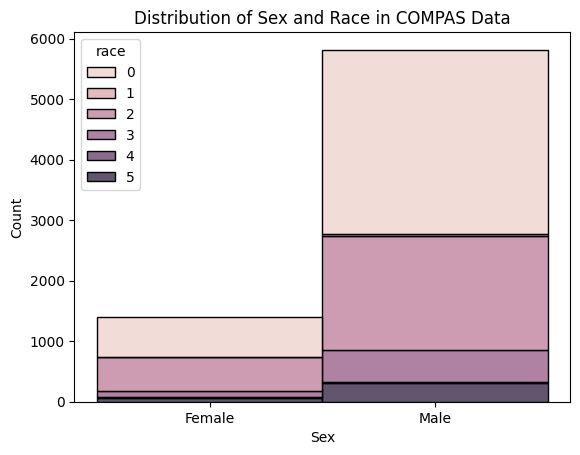

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=compas_data_modify, x="sex", hue="race", multiple="stack", discrete=True)
plt.xticks([0, 1], labels=["Female", "Male"])  # Set custom labels for x-axis (0: Female, 1: Male)
plt.xlabel("Sex")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.title("Distribution of Sex and Race in COMPAS Data")  # Add a title
plt.show()





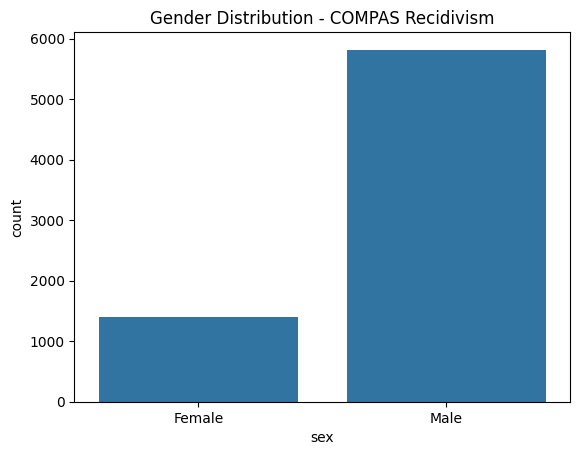

In [249]:
plt.xticks([0, 1], labels=["Female", "Male"])
sns.countplot(x='sex', data=compas_data_modify)
plt.title('Gender Distribution - COMPAS Recidivism')
plt.show()

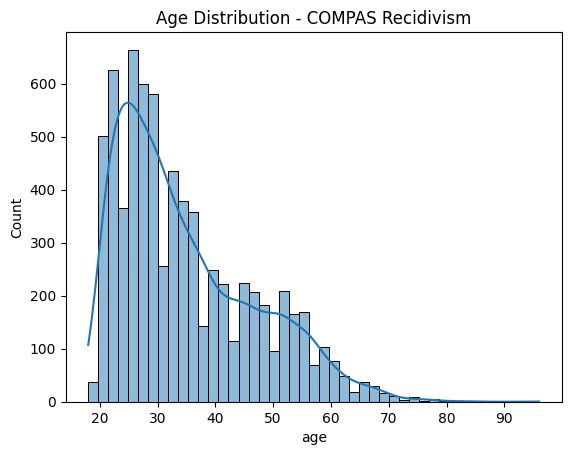

In [250]:
sns.histplot(compas_data_modify['age'], kde=True)
plt.title('Age Distribution - COMPAS Recidivism')
plt.show()

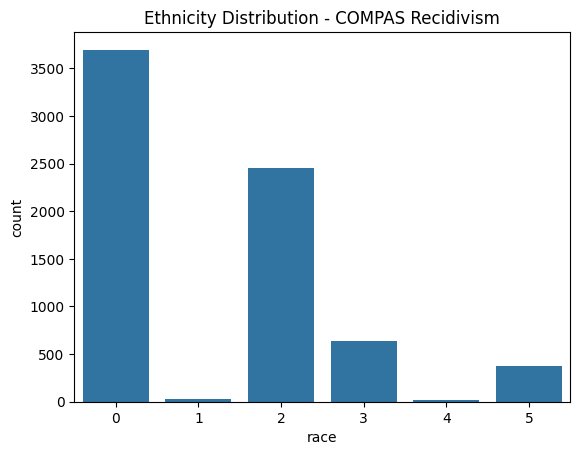

In [251]:
sns.countplot(x='race', data=compas_data_modify)
plt.title('Ethnicity Distribution - COMPAS Recidivism')
plt.show()

GERMAN CREDIT DATA

In [6]:
german_credit_data = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\German Credit\german_credit_data.csv")

In [7]:
print(german_credit_data.shape)

(1000, 11)


In [8]:
print(german_credit_data.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


In [9]:
print(german_credit_data.describe())

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


In [10]:
german_credit_data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [11]:
german_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [12]:
german_credit_data_modify = german_credit_data.drop(columns=['Unnamed: 0'])

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [14]:
le = LabelEncoder()

In [15]:
german_credit_data_modify['Sex'] = pd.Series(
    le.fit_transform(german_credit_data_modify['Sex'].dropna()),  # Encode non-NaN values
    index=german_credit_data_modify['Sex'].dropna().index         # Preserve the index of non-NaN values
)

german_credit_data_modify['Housing'] = pd.Series(
    le.fit_transform(german_credit_data_modify['Housing'].dropna()),  # Encode non-NaN values
    index=german_credit_data_modify['Housing'].dropna().index         # Preserve the index of non-NaN values
)

german_credit_data_modify['Saving accounts'] = pd.Series(
    le.fit_transform(german_credit_data_modify['Saving accounts'].dropna()),  # Encode non-NaN values
    index=german_credit_data_modify['Saving accounts'].dropna().index         # Preserve the index of non-NaN values
)

german_credit_data_modify['Checking account'] = pd.Series(
    le.fit_transform(german_credit_data_modify['Checking account'].dropna()),  # Encode non-NaN values
    index=german_credit_data_modify['Checking account'].dropna().index         # Preserve the index of non-NaN values
)

german_credit_data_modify['Purpose'] = pd.Series(
    le.fit_transform(german_credit_data_modify['Purpose'].dropna()),  # Encode non-NaN values
    index=german_credit_data_modify['Purpose'].dropna().index         # Preserve the index of non-NaN values
)

german_credit_data_modify['Risk'] = pd.Series(
    le.fit_transform(german_credit_data_modify['Risk'].dropna()),  # Encode non-NaN values
    index=german_credit_data_modify['Risk'].dropna().index         # Preserve the index of non-NaN values
)

In [16]:
print(german_credit_data_modify.head(9))

   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1              NaN               0.0           1169   
1   22    0    2        1              0.0               1.0           5951   
2   49    1    1        1              0.0               NaN           2096   
3   45    1    2        0              0.0               0.0           7882   
4   53    1    2        0              0.0               0.0           4870   
5   35    1    1        0              NaN               NaN           9055   
6   53    1    2        1              2.0               NaN           2835   
7   35    1    3        2              0.0               1.0           6948   
8   61    1    1        1              3.0               NaN           3059   

   Duration  Purpose  Risk  
0         6        5     1  
1        48        5     0  
2        12        3     1  
3        42        4     1  
4        24        1     0  
5        36        3     1  
6     

In [17]:
print(german_credit_data_modify["Checking account"].unique())

[ 0.  1. nan  2.]


In [18]:
german_credit_data_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Sex               1000 non-null   int64  
 2   Job               1000 non-null   int64  
 3   Housing           1000 non-null   int64  
 4   Saving accounts   817 non-null    float64
 5   Checking account  606 non-null    float64
 6   Credit amount     1000 non-null   int64  
 7   Duration          1000 non-null   int64  
 8   Purpose           1000 non-null   int64  
 9   Risk              1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


In [19]:
german_credit_data_modify.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [20]:
missing_percentage = german_credit_data_modify.isnull().mean() * 100
print(missing_percentage)

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64


German Credit Data Total Missing Values Percentage

In [21]:
# Calculate total percentage of missing values in the dataset
GermanC_total_missing_percentage = german_credit_data_modify.isnull().sum().sum() / (german_credit_data_modify.shape[0] * german_credit_data_modify.shape[1]) * 100

print(f"Total percentage of missing values: {GermanC_total_missing_percentage :.2f}%")

Total percentage of missing values: 5.77%


Replacing the missing values with -1

In [22]:
german_credit_data_modify = german_credit_data_modify.fillna(-1)

In [23]:
GermanC_total_missing_percentage = german_credit_data_modify.isnull().sum().sum() / (german_credit_data_modify.shape[0] * german_credit_data_modify.shape[1]) * 100

print(f"Total percentage of missing values: {GermanC_total_missing_percentage :.2f}%")

Total percentage of missing values: 0.00%


In [24]:
german_credit_data_modify["Checking account"].unique()

array([ 0.,  1., -1.,  2.])

**German Credit Data Ground Truth**

In [25]:
german_credit_data_modify.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\German Credit\German_Credit_Ground_Truth.csv", index=False)

**German Credit Data 10% MCAR**

In [26]:
import numpy as np
import pandas as pd

# Copy the data
german_credit_data_mcar10 = german_credit_data_modify.copy()

# Parameters
additional_missing_rate = 0.10
excluded_columns = ['Risk']

# Calculate target number of new missing entries
data_for_missing = german_credit_data_mcar10.drop(columns=excluded_columns)
total_entries = data_for_missing.size
target_missing = int(total_entries * additional_missing_rate) + 100

# Flatten the indices of eligible cells (not equal to -1)
eligible_indices = np.argwhere((german_credit_data_mcar10.drop(columns=excluded_columns).values != -1) &
                               (~pd.isna(german_credit_data_mcar10.drop(columns=excluded_columns).values)))

# Adjust target_missing if there are not enough eligible cells
if target_missing > len(eligible_indices):
    target_missing = len(eligible_indices)
    print(f"Adjusted target_missing to {target_missing} due to limited eligible cells.")

# Randomly select indices for missingness
selected_indices = eligible_indices[np.random.choice(len(eligible_indices), target_missing, replace=False)]

# Apply missingness to the selected indices directly in german_credit_data_mcar10
for row, col in selected_indices:
    actual_col = german_credit_data_mcar10.drop(columns=excluded_columns).columns[col]
    german_credit_data_mcar10.iat[row, german_credit_data_mcar10.columns.get_loc(actual_col)] = np.nan

# Save to CSV
german_credit_data_mcar10.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\German Credit\german_credit_data_mcar10.csv", index=False)

print("Missing values added and file saved successfully.")


Missing values added and file saved successfully.


In [27]:
German_MCAR_10 = german_credit_data_mcar10.isnull().sum().sum() / (german_credit_data_mcar10.shape[0] * german_credit_data_mcar10.shape[1]) * 100

print(f"Total percentage of missing values: {German_MCAR_10:.2f}%")

Total percentage of missing values: 10.00%


**German Credit Data 15% MCAR**

In [28]:
import numpy as np
import pandas as pd

# Copy the data
german_credit_data_mcar15 = german_credit_data_modify.copy()

# Parameters
additional_missing_rate = 0.15
excluded_columns = ['Risk']

# Calculate target number of new missing entries
data_for_missing = german_credit_data_mcar15.drop(columns=excluded_columns)
total_entries = data_for_missing.size
target_missing = int(total_entries * additional_missing_rate) + 150

# Flatten the indices of eligible cells (not equal to -1)
eligible_indices = np.argwhere((german_credit_data_mcar15.drop(columns=excluded_columns).values != -1) &
                               (~pd.isna(german_credit_data_mcar15.drop(columns=excluded_columns).values)))

# Adjust target_missing if there are not enough eligible cells
if target_missing > len(eligible_indices):
    target_missing = len(eligible_indices)
    print(f"Adjusted target_missing to {target_missing} due to limited eligible cells.")

# Randomly select indices for missingness
selected_indices = eligible_indices[np.random.choice(len(eligible_indices), target_missing, replace=False)]

# Apply missingness to the selected indices directly in german_credit_data_mcar15
for row, col in selected_indices:
    actual_col = german_credit_data_mcar15.drop(columns=excluded_columns).columns[col]
    german_credit_data_mcar15.iat[row, german_credit_data_mcar15.columns.get_loc(actual_col)] = np.nan

# Save to CSV
german_credit_data_mcar15.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\German Credit\german_credit_data_mcar15.csv", index=False)



In [29]:
German_MCAR_15 = german_credit_data_mcar15.isnull().sum().sum() / (german_credit_data_mcar15.shape[0] * german_credit_data_mcar15.shape[1]) * 100

print(f"Total percentage of missing values: {German_MCAR_15:.2f}%")

Total percentage of missing values: 15.00%


**German credit Data 20% MCAR**

In [30]:
import numpy as np
import pandas as pd

# Copy the data
german_credit_data_mcar20 = german_credit_data_modify.copy()

# Parameters
additional_missing_rate = 0.20
excluded_columns = ['Risk']

# Calculate target number of new missing entries
data_for_missing = german_credit_data_mcar20.drop(columns=excluded_columns)
total_entries = data_for_missing.size
target_missing = int(total_entries * additional_missing_rate) + 200

# Flatten the indices of eligible cells (not equal to -1)
eligible_indices = np.argwhere((german_credit_data_mcar20.drop(columns=excluded_columns).values != -1) &
                               (~pd.isna(german_credit_data_mcar20.drop(columns=excluded_columns).values)))

# Adjust target_missing if there are not enough eligible cells
if target_missing > len(eligible_indices):
    target_missing = len(eligible_indices)
    print(f"Adjusted target_missing to {target_missing} due to limited eligible cells.")

# Randomly select indices for missingness
selected_indices = eligible_indices[np.random.choice(len(eligible_indices), target_missing, replace=False)]

# Apply missingness to the selected indices directly in german_credit_data_mcar20
for row, col in selected_indices:
    actual_col = german_credit_data_mcar20.drop(columns=excluded_columns).columns[col]
    german_credit_data_mcar20.iat[row, german_credit_data_mcar20.columns.get_loc(actual_col)] = np.nan

# Save to CSV
german_credit_data_mcar20.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\German Credit\german_credit_data_mcar20.csv", index=False)

print("Missing values added and file saved successfully.")


Missing values added and file saved successfully.


In [31]:
German_MCAR20 = german_credit_data_mcar20.isnull().sum().sum() / (german_credit_data_mcar20.shape[0] * german_credit_data_mcar20.shape[1]) * 100

print(f"Total percentage of missing values: {German_MCAR20:.2f}%")

Total percentage of missing values: 20.00%


**German Credit Data 25% MCAR**

In [32]:
import numpy as np
import pandas as pd

# Copy the data
german_credit_data_mcar25 = german_credit_data_modify.copy()

# Parameters
additional_missing_rate = 0.25
excluded_columns = ['Risk']

# Calculate target number of new missing entries
data_for_missing = german_credit_data_mcar25.drop(columns=excluded_columns)
total_entries = data_for_missing.size
target_missing = int(total_entries * additional_missing_rate) + 250

# Flatten the indices of eligible cells (not equal to -1)
eligible_indices = np.argwhere((german_credit_data_mcar25.drop(columns=excluded_columns).values != -1) &
                               (~pd.isna(german_credit_data_mcar25.drop(columns=excluded_columns).values)))

# Adjust target_missing if there are not enough eligible cells
if target_missing > len(eligible_indices):
    target_missing = len(eligible_indices)
    print(f"Adjusted target_missing to {target_missing} due to limited eligible cells.")

# Randomly select indices for missingness
selected_indices = eligible_indices[np.random.choice(len(eligible_indices), target_missing, replace=False)]

# Apply missingness to the selected indices directly in german_credit_data_mcar25
for row, col in selected_indices:
    actual_col = german_credit_data_mcar25.drop(columns=excluded_columns).columns[col]
    german_credit_data_mcar25.iat[row, german_credit_data_mcar25.columns.get_loc(actual_col)] = np.nan

# Save to CSV
german_credit_data_mcar25.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\German Credit\german_credit_data_mcar25.csv", index=False)

print("Missing values added and file saved successfully.")


Missing values added and file saved successfully.


In [33]:
German_MCAR_25 = german_credit_data_mcar25.isnull().sum().sum() / (german_credit_data_mcar25.shape[0] * german_credit_data_mcar25.shape[1]) * 100

print(f"Total percentage of missing values: {German_MCAR_25:.2f}%")

Total percentage of missing values: 25.00%


**German Credit Data 30% MCAR**

In [34]:
import numpy as np
import pandas as pd

# Copy the data
german_credit_data_mcar30 = german_credit_data_modify.copy()

# Parameters
additional_missing_rate = 0.30
excluded_columns = ['Risk']

# Calculate target number of new missing entries
data_for_missing = german_credit_data_mcar30.drop(columns=excluded_columns)
total_entries = data_for_missing.size
target_missing = int(total_entries * additional_missing_rate) + 300

# Flatten the indices of eligible cells (not equal to -1)
eligible_indices = np.argwhere((german_credit_data_mcar30.drop(columns=excluded_columns).values != -1) &
                               (~pd.isna(german_credit_data_mcar30.drop(columns=excluded_columns).values)))

# Adjust target_missing if there are not enough eligible cells
if target_missing > len(eligible_indices):
    target_missing = len(eligible_indices)
    print(f"Adjusted target_missing to {target_missing} due to limited eligible cells.")

# Randomly select indices for missingness
selected_indices = eligible_indices[np.random.choice(len(eligible_indices), target_missing, replace=False)]

# Apply missingness to the selected indices directly in german_credit_data_mcar30
for row, col in selected_indices:
    actual_col = german_credit_data_mcar30.drop(columns=excluded_columns).columns[col]
    german_credit_data_mcar30.iat[row, german_credit_data_mcar30.columns.get_loc(actual_col)] = np.nan

# Save to CSV
german_credit_data_mcar30.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\German Credit\german_credit_data_mcar30.csv", index=False)

print("Missing values added and file saved successfully.")


Missing values added and file saved successfully.


In [35]:
German_MCAR_30 = german_credit_data_mcar30.isnull().sum().sum() / (german_credit_data_mcar30.shape[0] * german_credit_data_mcar30.shape[1]) * 100

print(f"Total percentage of missing values: {German_MCAR_30:.2f}%")

Total percentage of missing values: 30.00%


In [36]:
print(german_credit_data_mcar30.head())

    Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   NaN  1.0  2.0      1.0             -1.0               NaN            NaN   
1  22.0  NaN  2.0      1.0              0.0               1.0            NaN   
2   NaN  NaN  NaN      1.0              0.0              -1.0         2096.0   
3  45.0  1.0  2.0      NaN              0.0               0.0         7882.0   
4  53.0  NaN  2.0      NaN              0.0               0.0         4870.0   

   Duration  Purpose  Risk  
0       6.0      5.0     1  
1       NaN      5.0     0  
2      12.0      3.0     1  
3      42.0      4.0     1  
4      24.0      NaN     0  


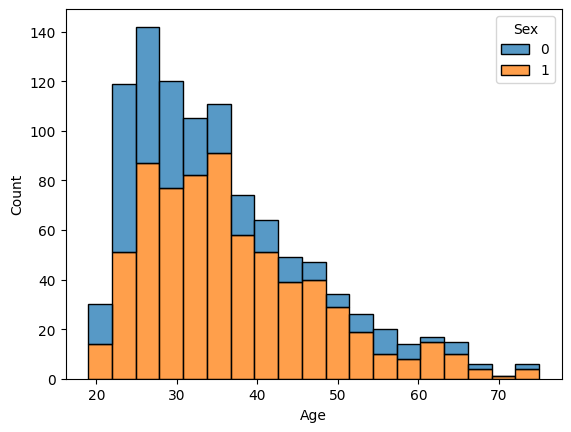

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(german_credit_data_modify, x="Age", hue="Sex", multiple="stack")
plt.show()

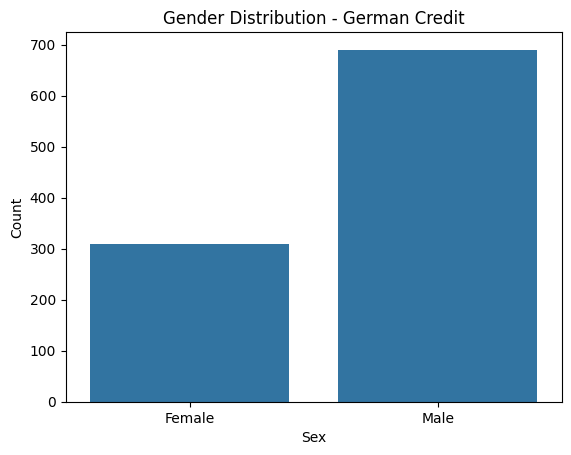

In [38]:
sns.countplot(x='Sex', data=german_credit_data_modify)
plt.title('Gender Distribution - German Credit')
plt.xticks([0, 1], labels=["Female", "Male"])  # Set custom labels for x-axis (0: Female, 1: Male)
plt.xlabel("Sex")  # Add x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.show()



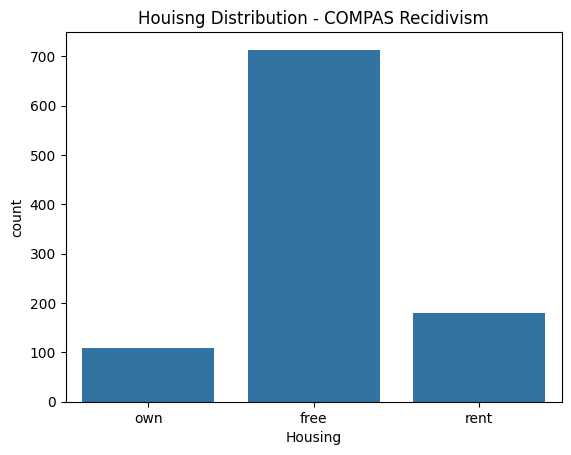

In [39]:
sns.countplot(x= 'Housing', data=german_credit_data_modify)
plt.title('Houisng Distribution - COMPAS Recidivism')
plt.xticks([0, 1, 2], labels=["own", "free","rent"]) 
plt.show()

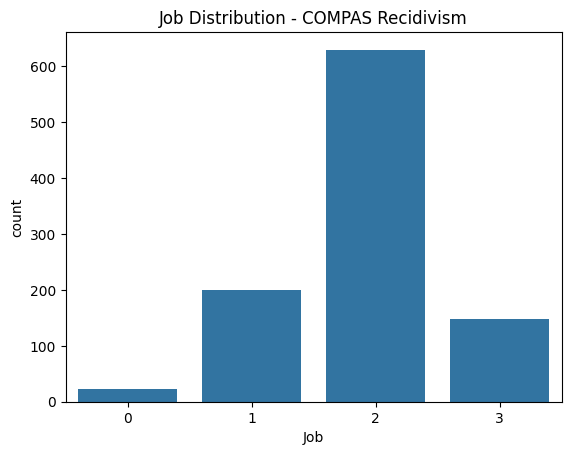

In [40]:
sns.countplot(x= 'Job', data=german_credit_data_modify)
plt.title('Job Distribution - COMPAS Recidivism')
plt.show()

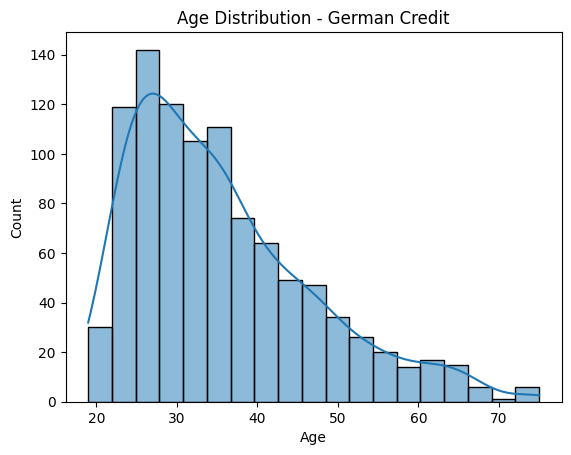

In [41]:
sns.histplot(german_credit_data_modify['Age'], kde=True)
plt.title('Age Distribution - German Credit')
plt.show()

ADULT DATA

In [179]:
adult_data = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\adult\adult_original.csv")

In [156]:
adult_missing_percentage = adult_data.isnull().sum().sum() / (adult_data.shape[0] * adult_data.shape[1]) * 100

print(f"Total percentage of missing values: {adult_missing_percentage:.2f}%")

Total percentage of missing values: 0.30%


In [131]:
print(adult_data.shape)

(48842, 15)


In [132]:
print(adult_data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [133]:
print(adult_data.describe)

<bound method NDFrame.describe of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial 

In [134]:
print(adult_data.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [135]:
print(adult_data['native-country'].unique())

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands' nan]


In [136]:
# Drop the 'education' column
adult_data_modify = adult_data.drop(columns=['education'])


In [137]:
type(adult_data_modify)

pandas.core.frame.DataFrame

In [138]:

import numpy as np
adult_data_modify = adult_data_modify.replace('?', np.nan)
adult_data_modify = adult_data_modify.fillna(-1)



In [139]:
print(adult_data_modify.isnull().sum())  
print((adult_data_modify == '?').sum())  

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [140]:
adult_data_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [141]:
print(adult_data_modify["workclass"].unique())
print(adult_data_modify["marital-status"].unique())
print(adult_data_modify["occupation"].unique())
print(adult_data_modify["relationship"].unique())
print(adult_data_modify["race"].unique())
print(adult_data_modify["sex"].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' -1
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' -1 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']


In [142]:
relationship = {'Husband': 1, 'Wife': 1, 'Own-child': 2, 'Other-relative': 3,'Unmarried':4,'Not-in-family':4}
adult_data_modify['relationship'] = adult_data_modify['relationship'].map(relationship)


In [143]:
sex = {'Male': 1, 'Female': 2}
adult_data_modify['sex'] = adult_data_modify['sex'].map(sex)

In [144]:
race = {'White': 1, 'Black': 2, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 2,'Other':2}
adult_data_modify['race'] = adult_data_modify['race'].map(race)

In [145]:
workclass = {'State-gov': 1, 'Federal-gov': 1, 'Local-gov': 1, 'Private': 2,'Self-emp-inc':3,'Self-emp-not-inc':3,'Without-pay':4,'Never-worked':5,-1:-1}
adult_data_modify['workclass'] = adult_data_modify['workclass'].map(workclass)

In [146]:
maritalstatus = {'Married-civ-spouse': 1, 'Married-AF-spouse': 1, 'Married-spouse-absent': 1, 'Divorced': 2,'Separated':2,'Widowed':2,'Never-married':3}
adult_data_modify['marital-status'] = adult_data_modify['marital-status'].map(maritalstatus)

In [147]:
occupation = {'Adm-clerical': 1, 'Exec-managerial': 1, 'Prof-specialty': 1, 'Protective-serv': 3,'Priv-house-serv':3,'Other-service':3,'Sales':3,'Craft-repair':2,'Machine-op-inspct':2,'Transport-moving':2,'Farming-fishing':2,'Handlers-cleaners':2,'Tech-support':3,'Armed-Forces':3,-1:-1}
adult_data_modify['occupation'] = adult_data_modify['occupation'].map(occupation)

In [148]:
print(adult_data_modify['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


In [149]:
from sklearn.preprocessing import LabelEncoder

# Example for one column
label_encoder = LabelEncoder()
adult_data_modify['income'] = label_encoder.fit_transform(adult_data_modify['income'])


In [150]:
country_to_region = {
    'United-States': 'North America', 'Cuba': 'North America', 'Jamaica': 'Caribbean', 
    'India': 'Asia', 'Mexico': 'North America', 'South': -1, 'Puerto-Rico': 'North America', 
    'Honduras': 'North America', 'England': 'Europe', 'Canada': 'North America', 'Germany': 'Europe', 
    'Iran': 'Asia', 'Philippines': 'Asia', 'Italy': 'Europe', 'Poland': 'Europe', 
    'Columbia': 'South America', 'Cambodia': 'Asia', 'Thailand': 'Asia', 'Ecuador': 'South America', 
    'Laos': 'Asia', 'Taiwan': 'Asia', 'Haiti': 'Caribbean', 'Portugal': 'Europe', 
    'Dominican-Republic': 'North America', 'El-Salvador': 'North America', 'France': 'Europe', 
    'Guatemala': 'North America', 'China': 'Asia', 'Japan': 'Asia', 'Yugoslavia': 'Europe', 
    'Peru': 'South America', 'Outlying-US(Guam-USVI-etc)': 'North America', 'Scotland': 'Europe', 
    'Trinadad&Tobago': 'Caribbean', 'Greece': 'Europe', 'Nicaragua': 'North America', 
    'Vietnam': 'Asia', 'Hong': 'Asia', 'Ireland': 'Europe', 'Hungary': 'Europe', 
    'Holand-Netherlands': 'Europe', -1: -1
}

region_to_number = {
    'North America': 1,
    'South America': 2,
    'Europe': 3,
    'Asia': 4,
    'Caribbean': 5,
    -1 : -1
}

# Step 2: Replace the native-country column with continent numbers
adult_data_modify['native-country'] = (
    adult_data_modify['native-country']
    .map(country_to_region)   # Convert countries to regions
    .map(region_to_number)    # Convert regions to numeric codes
)

In [151]:
adult_data_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       48842 non-null  int64
 2   fnlwgt          48842 non-null  int64
 3   education-num   48842 non-null  int64
 4   marital-status  48842 non-null  int64
 5   occupation      48842 non-null  int64
 6   relationship    48842 non-null  int64
 7   race            48842 non-null  int64
 8   sex             48842 non-null  int64
 9   capital-gain    48842 non-null  int64
 10  capital-loss    48842 non-null  int64
 11  hours-per-week  48842 non-null  int64
 12  native-country  48842 non-null  int64
 13  income          48842 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [180]:
adult_data_modify.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\adult\adult_data_modify.csv", index=False)

In [181]:
adult_data_modify.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,13,3,1,4,1,1,2174,0,40,1,0
1,50,3,83311,13,1,1,1,1,1,0,0,13,1,0
2,38,2,215646,9,2,2,4,1,1,0,0,40,1,0
3,53,2,234721,7,1,2,1,2,1,0,0,40,1,0
4,28,2,338409,13,1,1,1,2,2,0,0,40,1,0


Creating a new dataset which does not have any missing value coloumns

In [182]:
adult_data_without_missing_values = adult_data.drop(columns=['education'])


In [183]:
adult_data_without_missing_values = adult_data_without_missing_values.replace('?', pd.NA)

# Drop rows with NaN (which now include rows that had '?')
adult_data_without_missing_values = adult_data_without_missing_values.dropna()

# Reset the index for cleanliness
#adult_data_without_missing_values = adult_data_without_missing_values.reset_index(drop=True)

In [184]:
relationship = {'Husband': 1, 'Wife': 1, 'Own-child': 2, 'Other-relative': 3,'Unmarried':4,'Not-in-family':4}
adult_data_without_missing_values['relationship'] = adult_data_without_missing_values['relationship'].map(relationship)

sex = {'Male': 1, 'Female': 2}
adult_data_without_missing_values['sex'] = adult_data_without_missing_values['sex'].map(sex)

race = {'White': 1, 'Black': 2, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 2,'Other':2}
adult_data_without_missing_values['race'] = adult_data_without_missing_values['race'].map(race)

workclass = {'State-gov': 1, 'Federal-gov': 1, 'Local-gov': 1, 'Private': 2,'Self-emp-inc':3,'Self-emp-not-inc':3,'Without-pay':4,'Never-worked':5,-1:-1}
adult_data_without_missing_values['workclass'] = adult_data_without_missing_values['workclass'].map(workclass)

maritalstatus = {'Married-civ-spouse': 1, 'Married-AF-spouse': 1, 'Married-spouse-absent': 1, 'Divorced': 2,'Separated':2,'Widowed':2,'Never-married':3}
adult_data_without_missing_values['marital-status'] = adult_data_without_missing_values['marital-status'].map(maritalstatus)

occupation = {'Adm-clerical': 1, 'Exec-managerial': 1, 'Prof-specialty': 1, 'Protective-serv': 3,'Priv-house-serv':3,'Other-service':3,'Sales':3,'Craft-repair':2,'Machine-op-inspct':2,'Transport-moving':2,'Farming-fishing':2,'Handlers-cleaners':2,'Tech-support':3,'Armed-Forces':3,-1:-1}
adult_data_without_missing_values['occupation'] = adult_data_without_missing_values['occupation'].map(occupation)


# Example for one column
label_encoder = LabelEncoder()
adult_data_without_missing_values['income'] = label_encoder.fit_transform(adult_data_without_missing_values['income'])

adult_data_without_missing_values['native-country'] = (
    adult_data_without_missing_values['native-country']
    .map(country_to_region)   # Convert countries to regions
    .map(region_to_number)    # Convert regions to numeric codes
)



In [185]:
adult_data_without_missing_values.head(2)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,13,3,1,4,1,1,2174,0,40,1,0
1,50,3,83311,13,1,1,1,1,1,0,0,13,1,0


In [186]:
adult_data_without_missing_values.shape

(45222, 14)

In [187]:
adult_data_without_missing_values.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\adult\adult_data_without_missing_values.csv", index=False)

In [188]:
adult_data_without_missing_values.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

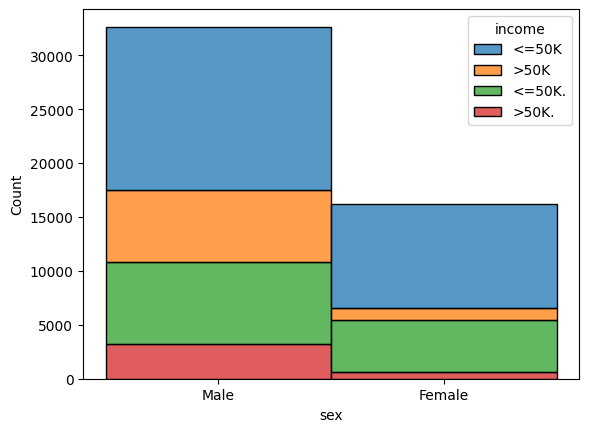

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(adult_data, x="sex", hue="income", multiple="stack")
plt.show()

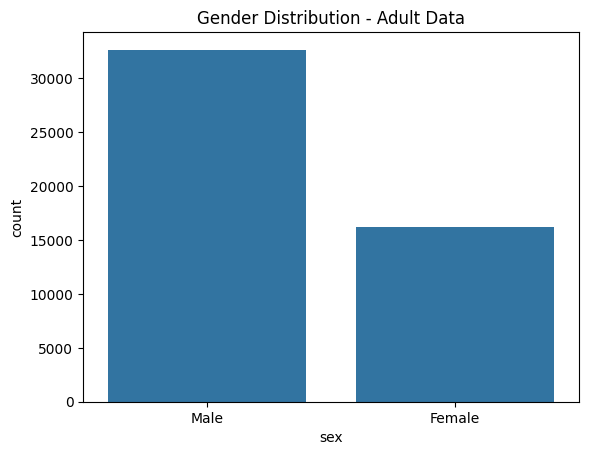

In [89]:
sns.countplot(x='sex', data = adult_data)
plt.title('Gender Distribution - Adult Data')
plt.show()

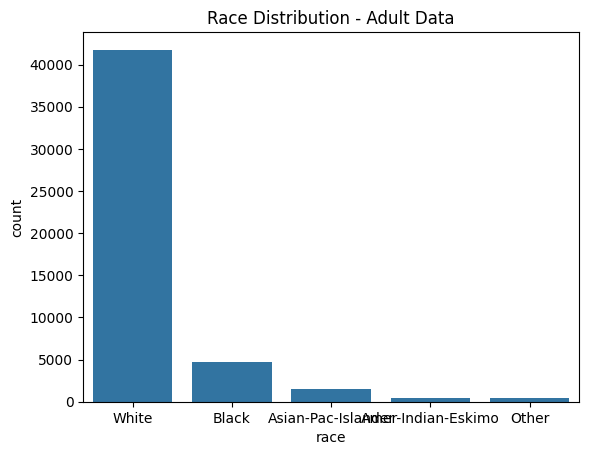

In [90]:
sns.countplot(x='race', data = adult_data)
plt.title('Race Distribution - Adult Data')
plt.show()

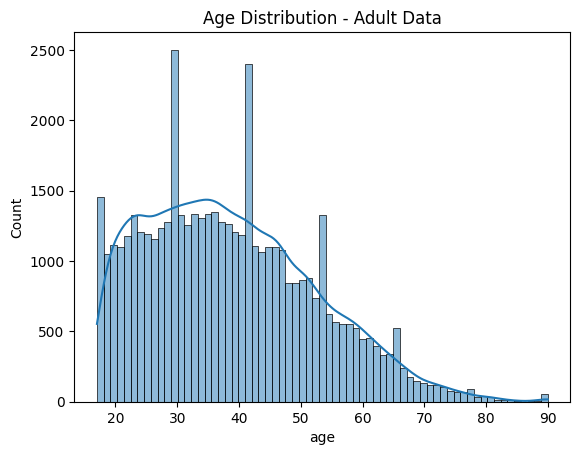

In [91]:
sns.histplot(adult_data['age'], kde=True)
plt.title('Age Distribution - Adult Data')
plt.show()

In [92]:
missing_percentage = adult_data.isnull().mean() * 100
print(missing_percentage)

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64


Total missing value percantage in Adult Data

In [93]:
# Calculate total percentage of missing values in the dataset
Adult_total_missing_percentage = adult_data.isnull().sum().sum() / (adult_data.shape[0] * adult_data.shape[1]) * 100

print(f"Total percentage of missing values: {Adult_total_missing_percentage :.2f}%")

Total percentage of missing values: 0.30%


**Portugal student performance dataset**

In [95]:
student_mat = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\portugal student performance dataset\student-mat.csv",sep=';')
student_por = pd.read_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\portugal student performance dataset\student-por.csv",sep=';')

In [96]:
missing_values = student_mat.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [97]:
missing_values = student_por.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [98]:
common_columns = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']

df = pd.merge(student_mat, student_por, on=common_columns, suffixes=('_math_data','_por_data'))

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por_data,freetime_por_data,goout_por_data,Dalc_por_data,Walc_por_data,health_por_data,absences_por_data,G1_por_data,G2_por_data,G3_por_data
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [106]:
df_special_encoding = pd.merge(student_mat, student_por, on=common_columns, suffixes=('_math_data','_por_data'))

In [99]:
df.shape

(382, 53)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   school                382 non-null    object
 1   sex                   382 non-null    object
 2   age                   382 non-null    int64 
 3   address               382 non-null    object
 4   famsize               382 non-null    object
 5   Pstatus               382 non-null    object
 6   Medu                  382 non-null    int64 
 7   Fedu                  382 non-null    int64 
 8   Mjob                  382 non-null    object
 9   Fjob                  382 non-null    object
 10  reason                382 non-null    object
 11  guardian_math_data    382 non-null    object
 12  traveltime_math_data  382 non-null    int64 
 13  studytime_math_data   382 non-null    int64 
 14  failures_math_data    382 non-null    int64 
 15  schoolsup_math_data   382 non-null    ob

In [101]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_math_data', 'traveltime_math_data',
       'studytime_math_data', 'failures_math_data', 'schoolsup_math_data',
       'famsup_math_data', 'paid_math_data', 'activities_math_data', 'nursery',
       'higher_math_data', 'internet', 'romantic_math_data',
       'famrel_math_data', 'freetime_math_data', 'goout_math_data',
       'Dalc_math_data', 'Walc_math_data', 'health_math_data',
       'absences_math_data', 'G1_math_data', 'G2_math_data', 'G3_math_data',
       'guardian_por_data', 'traveltime_por_data', 'studytime_por_data',
       'failures_por_data', 'schoolsup_por_data', 'famsup_por_data',
       'paid_por_data', 'activities_por_data', 'higher_por_data',
       'romantic_por_data', 'famrel_por_data', 'freetime_por_data',
       'goout_por_data', 'Dalc_por_data', 'Walc_por_data', 'health_por_data',
       'absences_por_data', 'G1_por_data', 'G2_por_data', 'G3_p

In [102]:
df['school'] = df['school'].map({'GP': 1, 'MS': 2})
df['sex'] = df['sex'].map({'F': 1, 'M': 2})
df['address'] = df['address'].map({'U': 1, 'R': 2})
df['famsize'] = df['famsize'].map({'GT3': 1, 'LE3': 2})
df['Pstatus'] = df['Pstatus'].map({'A': 1, 'T': 2})
df['Mjob'] = df['Mjob'].map({'health': 1, 'teacher': 2,'services':3,'other':4,'at_home':5})
df['Fjob'] = df['Fjob'].map({'health': 1, 'teacher': 2,'services':3,'other':4,'at_home':5})
df['reason'] = df['reason'].map({'course': 1, 'reputation': 2,'home':3,'other':4})
df['guardian_math_data'] = df['guardian_math_data'].map({'mother': 1, 'father': 2,'other':3})
df['schoolsup_math_data'] = df['schoolsup_math_data'].map({'yes': 1, 'no': 2})
df['famsup_math_data'] = df['famsup_math_data'].map({'yes': 1, 'no': 2})
df['paid_math_data'] = df['paid_math_data'].map({'yes': 1, 'no': 2})
df['activities_math_data'] = df['activities_math_data'].map({'yes': 1, 'no': 2})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 2})
df['higher_math_data'] = df['higher_math_data'].map({'yes': 1, 'no': 2})
df['romantic_math_data'] = df['romantic_math_data'].map({'yes': 1, 'no': 2})
df['internet'] = df['internet'].map({'yes': 1, 'no': 2})
df['guardian_por_data'] = df['guardian_por_data'].map({'mother': 1, 'father': 2,'other':3})
df['schoolsup_por_data'] = df['schoolsup_por_data'].map({'yes': 1, 'no': 2})
df['famsup_por_data'] = df['famsup_por_data'].map({'yes': 1, 'no': 2})
df['paid_por_data'] = df['paid_por_data'].map({'yes': 1, 'no': 2})
df['activities_por_data'] = df['activities_por_data'].map({'yes': 1, 'no': 2})
df['higher_por_data'] = df['higher_por_data'].map({'yes': 1, 'no': 2})
df['romantic_por_data'] = df['romantic_por_data'].map({'yes': 1, 'no': 2})


In [107]:
df_special_encoding['school'] = df_special_encoding['school'].map({'GP': 1, 'MS': 5})
df_special_encoding['sex'] = df_special_encoding['sex'].map({'F': 10, 'M': 1})
df_special_encoding['address'] = df_special_encoding['address'].map({'U': 16, 'R': 26})
df_special_encoding['famsize'] = df_special_encoding['famsize'].map({'GT3': 31, 'LE3': 41})
df_special_encoding['Pstatus'] = df_special_encoding['Pstatus'].map({'A': 11, 'T': 22})
df_special_encoding['Mjob'] = df_special_encoding['Mjob'].map({'health': 10, 'teacher': 20,'services':30,'other':40,'at_home':50})
df_special_encoding['Fjob'] = df_special_encoding['Fjob'].map({'health': 10, 'teacher': 20,'services':30,'other':40,'at_home':50})
df_special_encoding['reason'] = df_special_encoding['reason'].map({'course': 10, 'reputation': 20,'home':30,'other':40})
df_special_encoding['guardian_math_data'] = df_special_encoding['guardian_math_data'].map({'mother': 15, 'father': 25,'other':35})
df_special_encoding['schoolsup_math_data'] = df_special_encoding['schoolsup_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['famsup_math_data'] = df_special_encoding['famsup_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['paid_math_data'] = df_special_encoding['paid_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['activities_math_data'] = df_special_encoding['activities_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['nursery'] = df_special_encoding['nursery'].map({'yes': 100, 'no': 200})
df_special_encoding['higher_math_data'] = df_special_encoding['higher_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['romantic_math_data'] = df_special_encoding['romantic_math_data'].map({'yes': 100, 'no': 200})
df_special_encoding['internet'] = df_special_encoding['internet'].map({'yes': 100, 'no': 200})
df_special_encoding['guardian_por_data'] = df_special_encoding['guardian_por_data'].map({'mother': 15, 'father': 25,'other':35})
df_special_encoding['schoolsup_por_data'] = df_special_encoding['schoolsup_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['famsup_por_data'] = df_special_encoding['famsup_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['paid_por_data'] = df_special_encoding['paid_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['activities_por_data'] = df_special_encoding['activities_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['higher_por_data'] = df_special_encoding['higher_por_data'].map({'yes': 100, 'no': 200})
df_special_encoding['romantic_por_data'] = df_special_encoding['romantic_por_data'].map({'yes': 100, 'no': 200})

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   school                382 non-null    int64
 1   sex                   382 non-null    int64
 2   age                   382 non-null    int64
 3   address               382 non-null    int64
 4   famsize               382 non-null    int64
 5   Pstatus               382 non-null    int64
 6   Medu                  382 non-null    int64
 7   Fedu                  382 non-null    int64
 8   Mjob                  382 non-null    int64
 9   Fjob                  382 non-null    int64
 10  reason                382 non-null    int64
 11  guardian_math_data    382 non-null    int64
 12  traveltime_math_data  382 non-null    int64
 13  studytime_math_data   382 non-null    int64
 14  failures_math_data    382 non-null    int64
 15  schoolsup_math_data   382 non-null    int64
 16  famsup_m

In [105]:
df.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\portugal student performance dataset\P_Student_Performance_Data.csv", index=False)

In [108]:
df_special_encoding.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\portugal student performance dataset\P_Student_Performance_Data_special_encoding.csv", index=False)

**Abalone**

In [139]:

# Define column names manually as there is no header in the file
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

# Read the dataset without a header and assign column names
abalone_data = pd.read_csv(r'C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\abalone\abalone.data', delimiter=',', header=None, names=columns)

print(abalone_data.head())


  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  


In [140]:
abalone_data.head(2)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [141]:
type(abalone_data)


pandas.core.frame.DataFrame

In [142]:
abalone_data.shape

(4177, 9)

In [143]:
abalone_data['Sex'] = abalone_data['Sex'].map({'M': 1, 'F': 2,'I':3})


In [144]:
abalone_data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [145]:
abalone_data.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\abalone\abalone.csv", index=False)

**Heart Failour**

In [151]:
heart_failour = pd.read_csv(r'C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Heart Failour\heart.csv')

In [152]:
heart_failour.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [157]:
heart_failour['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [158]:
heart_failour['Sex'] = heart_failour['Sex'].map({'M': 1, 'F':2})
heart_failour['ChestPainType'] = heart_failour['ChestPainType'].map({'ATA': 1, 'NAP':2,'ASY':3,'TA':4})
heart_failour['RestingECG'] = heart_failour['RestingECG'].map({'Normal': 1, 'ST':2,'LVH':3})
heart_failour['ExerciseAngina'] = heart_failour['ExerciseAngina'].map({'N': 1, 'Y':2})
heart_failour['ST_Slope'] = heart_failour['ST_Slope'].map({'Up': 1, 'Flat':2,'Down':3})

In [159]:
heart_failour.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


In [160]:
heart_failour.to_csv(r"C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\Heart Failour\heart_failour.csv", index=False)

In [161]:
heart_failour.shape

(918, 12)

**HSLS**

In [4]:
hsls = pd.read_csv(r'C:\Users\zhossai3\Desktop\My code\OT+Fairness\Data\hsls_17_student_pets_sr_v1_0.csv')

In [5]:
hsls.shape

(23503, 9614)

In [9]:
hsls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23503 entries, 0 to 23502
Columns: 9614 entries, STU_ID to W5W1W2W3W4PSRECORDS200
dtypes: float64(5855), int64(3759)
memory usage: 1.7 GB
